In [1]:
%matplotlib inline

In [2]:
%%writefile automaticSeeding_second_Version.py

import os 
import numpy as np 
import matplotlib.pyplot as plt
from read_files import read_files, normalization, resize_volume
import scipy.io as spio
from imutils import rotate
from math import sqrt

def find_seed(volume, thresh, lung):
    mask_HU = np.zeros(volume.shape)
    #print(mask_HU.shape)
    #mask_HU = volume[abs(volume+500)<500]
    min_HU = -800
    max_HU = -500
    sup = abs(min_HU-thresh)
    inf = abs(max_HU+thresh)
    mask_HU =np.where((volume >= min_HU) & (volume <= max_HU),volume,False)
    #mask_HU_indices = np.nonzero(np.where((volume >= -1000) & (volume <= -500),volume,False))
    s,r,c = np.nonzero(np.where((volume >= min_HU) & (volume <= max_HU),volume,False))

    min_slices = volume.shape[0]//3
    max_slices = volume.shape[0]*2//3 
    min_slices_index = 0
    max_slices_index = s.shape[0]
    for num in range(s.shape[0]):
        i = s[num]
        if i<min_slices and num>min_slices_index:
            min_slices_index=num
        if i>max_slices and num<max_slices_index:
            max_slices_index=num
    lung_slices = s[min_slices_index:max_slices_index]
    lung_rows = r[min_slices_index:max_slices_index]
    lung_cols = c[min_slices_index:max_slices_index]

    rows = volume.shape[1]//2
    cols = 0
    if lung == 'left':
        cols = volume.shape[2]*2//3
    if lung == 'right':
        cols = volume.shape[2]//3

    inicial_seed = [max_slices,rows,cols]
    #print("inicial seed: "+str(tuple(inicial_seed)))
    #print("value: "+str(volume[tuple(inicial_seed)]))
  
    
#     fig = plt.figure()  
#     fig.suptitle("Semente inicial", fontsize=16)
#     y = fig.add_subplot(1,2,1)
#     y.imshow(volume[:,rows,:])
#     y.scatter([inicial_seed[2]], [inicial_seed[0]],c='r', s=10)
#     x = fig.add_subplot(1,2,2)
#     x.imshow(mask_HU[:,rows,:])
#     x.scatter([inicial_seed[2]], [inicial_seed[0]],c='r',s=10)
#     plt.show()
    
    dist = []
    for i in range(len(s)):
        dist.append(sqrt((inicial_seed[0]-s[i])**2 + (inicial_seed[1]-r[i])**2 + (inicial_seed[2]-c[i])**2 ))
    min_dist = np.amin(dist)
    sort_index = np.argsort(dist)
    selected_position = sort_index[0];
    new_seed = [s[selected_position],r[selected_position],c[selected_position]]
    
#     fig_2 = plt.figure()  
#     fig_2.suptitle("Semente final", fontsize=16)
#     y = fig_2.add_subplot(1,2,1)
#     y.imshow(volume[:,rows,:])
#     y.scatter([new_seed[2]], [new_seed[0]],c='r', s=10)
#     x = fig_2.add_subplot(1,2,2)
#     x.imshow(mask_HU[:,rows,:])
#     x.scatter([new_seed[2]], [new_seed[0]],c='r',s=10)
#     plt.show()
              
    return tuple(new_seed),tuple(inicial_seed),min_dist


Overwriting automaticSeeding_second_Version.py


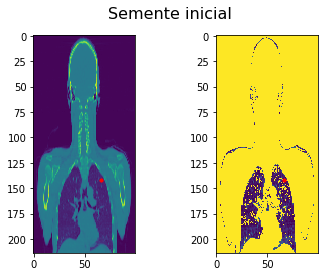

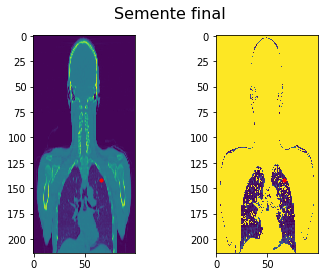

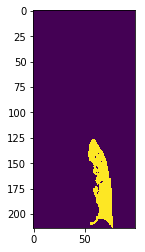

In [2]:
from segmentation_functions import resample, grow
from automaticSeeding_second_Version import find_seed
from .finding_biggest_lung import arrange_slices, normalization, get_pixels_hu
#from read_files import normalization
import scipy.ndimage.interpolation as inter
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.io as spio
import pydicom
import time


slices_path = "G:/CTimages/"
indices_path ="G:/Plans/CT/Lungs/ok/Separated Lungs"
segmentations_results_path = "G:/Plans/CT/Lungs/segmentation_results/"
indices_folder= os.listdir(indices_path)

patient_id = "32064030"#each_mask.split(" ", each_mask.count(each_mask))[0] 
slices= arrange_slices(slices_path,patient_id)
normalized_volume=normalization(slices)
normalized_array = np.array(normalized_volume)
volume_resampled, spacing = resample(normalized_array, slices, [5,5,5])
seed_1,seed_2,min_dist = find_seed(volume_resampled, 50,"left")
seg = np.zeros(volume_resampled.shape, dtype=np.bool)
seg, counter = grow(volume_resampled,seed_1,225,1,seg)



In [ ]:
mask_HU = np.zeros(volume_resampled.shape)
#print(mask_HU.shape)
#mask_HU = volume[abs(volume+500)<500]
min_HU = -850
max_HU = -700
mask_HU =np.where((volume_resampled >= min_HU) & (volume_resampled <= max_HU),volume_resampled,False)
#mask_HU_indices = np.nonzero(np.where((volume >= -1000) & (volume <= -500),volume,False))
s,r,c = np.nonzero(np.where((volume_resampled >= min_HU) & (volume_resampled <= max_HU),volume_resampled,False))

min_slices=volume_resampled.shape[0]//3
max_slices = volume_resampled.shape[0]*2//3 
lung_slices = s[min_slices:max_slices]
lung_rows = r[min_slices:max_slices]
lung_cols = c[min_slices:max_slices]